# NLP - CEIA - 2024

## Entrega 5


### Autor: Julio Donadello
### Email: juliodonadello@gmail.com
---

Nota: En este notebook se muestran los prints del Caso 1 y de los otros casos se adjunta el código. Para ver sus prints, redirigirse a los notebooks correspondientes.

In [1]:
!pip install transformers --quiet

In [2]:
import tensorflow
from transformers import TFBertModel

## Caso 1

Sentiment analysis: Modelo de max_length 140 y output_shape de 3 clases.

### Definiendo modelo

In [3]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [4]:
max_length = 140
output_shape = 3

In [5]:
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                       

#### Nota
Definimos un modelo "model" con los siguientes layers:
  - inputs: input_ids  y attention_mask.
  - LLM: tf_bert_model
  - Dropoutp
  - Fully Connected: dense.

Los parámetros entrenables son solomanete los de la última capa, 2307.

Las métricas que se utilizarán para evaluar el rendimiento del modelo durante el entrenamiento y la validación serán el __accuracy y el F1Score.__

In [7]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

### Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [8]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0  45153      0  0:00:02  0:00:02 --:--:--   99k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0   671k      0  0:00:10  0:00:10 --:--:-- 1824k


In [9]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
#df.head()

In [10]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Axes: xlabel='score', ylabel='count'>

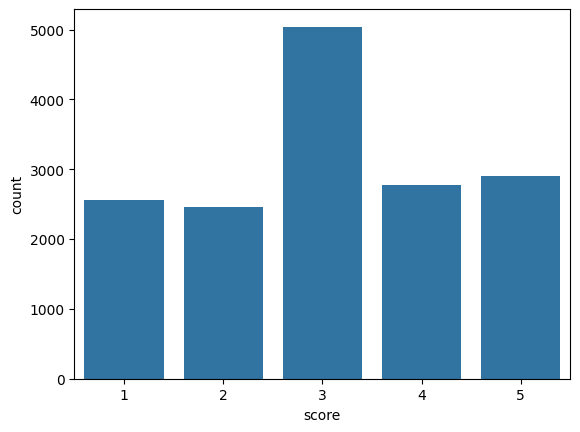

In [12]:
sns.countplot(x=df.score)

#### Limpieza de datos

In [13]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

<Axes: xlabel='sentiment', ylabel='count'>

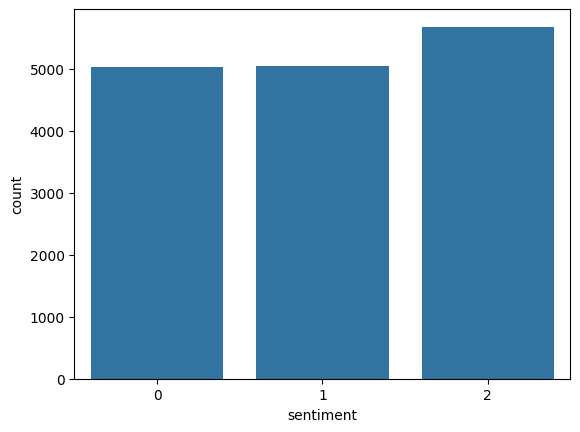

In [14]:
sns.countplot(x=df.sentiment)

In [15]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

Median sentence longitude: 139.0
----------------------------------------


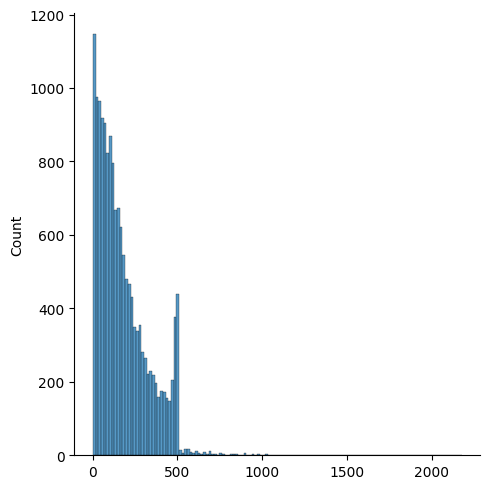

In [16]:
sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median sentence longitude:", np.median(sentence_lens))
print("-"*40)
sns.displot(sentence_lens)

In [17]:
from tensorflow.keras.utils import to_categorical

- Armo la variable de "output_shape" en base a las evaluaciones. Se usa la nueva columna creada: __"sentiment"__

In [18]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[5987:5990])
output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
output shape: 3


#### Data generator


In [19]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer
import numpy as np

In [20]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [21]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [22]:
print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [23]:
def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]

    return train_InputExamples, validation_InputExamples


def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )

In [24]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [25]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [26]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [27]:
y_test = y[idx_test]

### Entrenamiento
__Multiclass classification__

In [28]:
history1 = model.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15
315/315 [==============================] - 174s 412ms/step - loss: 1.1194 - accuracy: 0.3888 - f1_score: 0.3840 - val_loss: 1.0065 - val_accuracy: 0.5321 - val_f1_score: 0.4888
Epoch 2/15
315/315 [==============================] - 130s 412ms/step - loss: 1.0391 - accuracy: 0.4665 - f1_score: 0.4573 - val_loss: 0.9942 - val_accuracy: 0.5349 - val_f1_score: 0.4353
Epoch 3/15
315/315 [==============================] - 129s 411ms/step - loss: 0.9985 - accuracy: 0.4963 - f1_score: 0.4863 - val_loss: 0.9596 - val_accuracy: 0.5258 - val_f1_score: 0.4416
Epoch 4/15
315/315 [==============================] - 130s 413ms/step - loss: 0.9823 - accuracy: 0.5121 - f1_score: 0.5021 - val_loss: 0.9254 - val_accuracy: 0.5460 - val_f1_score: 0.5278
Epoch 5/15
315/315 [==============================] - 130s 413ms/step - loss: 0.9527 - accuracy: 0.5331 - f1_score: 0.5227 - val_loss: 0.9173 - val_accuracy: 0.5595 - val_f1_score: 0.5026
Epoch 6/15
315/315 [==============================] - 130s 4

##### Metricas

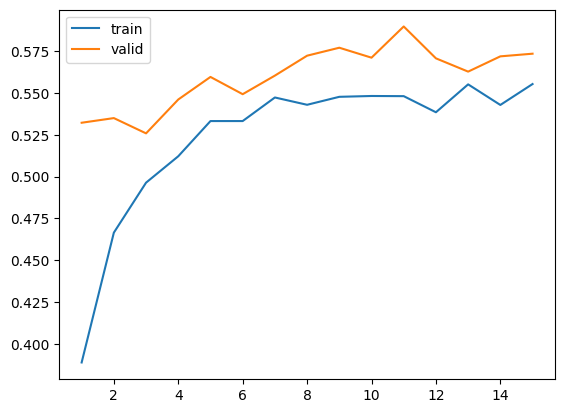

In [29]:
plot_train_metrics(history1)

In [30]:
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 34s 309ms/step


array([[0.50644815, 0.31084287, 0.18270898],
       [0.44104755, 0.2591782 , 0.29977435],
       [0.17575693, 0.3660537 , 0.45818937]], dtype=float32)

In [31]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [32]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

99/99 [==============================] - 34s 312ms/step - loss: 0.8715 - accuracy: 0.5765 - f1_score: 0.5365


0.5765079259872437

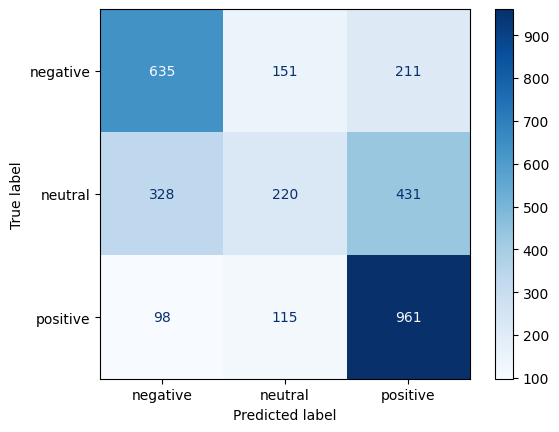

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

- Funciona muy bien para los extremos pero confunde los casos neutrales.

In [ ]:
model.save_weights('Caso1_weights.h5')
# Descargar los pesos a nuestra PC
# Solo es necesario si se desea repetir el uso de este modelo en el futuro
from google.colab import files
files.download('Caso1_weights.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Levantar el modelo

In [ ]:
bert_model3 = TFBertModel.from_pretrained("bert-base-uncased")

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')

# attention_mask - is a binary mask which tells BERT which tokens to attend and which not to attend.
# Encoder will add the 0 tokens to the some sequence which smaller than MAX_SEQUENCE_LENGTH,
# and attention_mask, in this case, tells BERT where is the token from the original data and where is 0 pad token:
attention_mask = tensorflow.keras.layers.Input((max_length,), dtype=tensorflow.int32, name='attention_mask')

# Get the pooled_output (embedding que representa toda la entrada)
output = bert_model3([input_ids, attention_mask])[1]

# We can also add dropout as regularization technique:
output = tensorflow.keras.layers.Dropout(rate=0.2)(output)

# Se puede agregar más capas Densas en el medio si se desea

# Provide number of classes to the final layer:
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(output)

# Final model:
model_fine = tensorflow.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)

In [ ]:
model_fine.load_weights('Caso1_weights.h5')

In [ ]:
model_fine.summary()

#### Fine tuning
Actualiza todos los parámetros del backbone de Bert.

In [28]:
model2 = model_fine #model

# Colocar todas las layers como entrenables
for layer in model2.layers:
  layer.trainable = True

# Como es fine tunning se recomiendo utiliza al menos un learning rate 100 veces
# menor
model2.compile(optimizer=tensorflow.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                       

__- Parámetros entrenables: 109.484.547__

- Se puede congelar las capas de bajo nivel de BERT y actualizar solamente las últimas para minimizar la cantidad de parámetros a reentrenar.

In [ ]:
history2 = model2.fit(train_data, epochs=15, validation_data=validation_data)

- No se terminó de entrenar el fine tunning por su demora pero se ve claramente como mejora el accuracy y la loss respecto del caso 1, donde entrenabamos los parámetros de la capa densa solamente.
- Realizando el fine tunning desde los pesos predeterminados, los primeros valores de accuracy: 0.3932.
- Realizando el fine tunning desde el entrenamiento del Caso 1, se obtiene en __validacion un 0.8 de accuracy__ en la primera época.
- Se debe aplicar un metodo de early stop para evitar que el modelo se sobreentrene, se observa que las metricas de validación dejan de mejorar a partir de la época 7 mientras que las de entrenamiento siguen creciendo.

In [ ]:
plot_train_metrics(history2)

In [ ]:
y_hat_prob2 = model2.predict(X_test)
y_hat_prob2[:3]

In [ ]:
y_hat2 = np.argmax(y_hat_prob2, axis=1)

In [ ]:
# Calcular la exactitud (accuracy)
scores = model2.evaluate(X_test, y_test)
scores[1]

In [ ]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat2)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
model2.save_weights('Caso1_fine_weights.h5')
# Descargar los pesos a nuestra PC
# Solo es necesario si se desea repetir el uso de este modelo en el futuro
from google.colab import files
files.download('Caso1_fine_weights.h5')

### Ensayo

- #1

In [34]:
text = "I do not like this app.-"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids'])
print("Attention mask:", tf_batch['attention_mask'])

Inputs ids: tf.Tensor(
[[  101  1045  2079  2025  2066  2023 10439  1012  1011   102     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [35]:
X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [36]:
class_names

['negative', 'neutral', 'positive']

In [37]:
y_prob_ensayo = model.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)])

1/1 [==============================] - 0s 99ms/step
Clasificación: negative


<ipython-input-37-339cf21b1202>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Clasificación:", class_names[int(y_prob)])


- #2

In [38]:
text = "The app seems regular but it's ok"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

y_prob_ensayo = model.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)])

1/1 [==============================] - 0s 88ms/step
Clasificación: positive


<ipython-input-38-5018675dc091>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Clasificación:", class_names[int(y_prob)])


- #3

In [39]:
text = "It is really good mate"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

y_prob_ensayo = model.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)])

1/1 [==============================] - 0s 111ms/step
Clasificación: positive


<ipython-input-39-f9a4ea9bd76b>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Clasificación:", class_names[int(y_prob)])


- El caso de entrenamiento 1 tuvo un desempeño correcto para los 3 ensayos, los cuales comprendian las 3 clases entrenadas.

## Caso 2
Clasificación: Modelo de max_length 70 y output_shape de 5 clases.

- Ver desarrollo en notebook: __Desafio5_BERT_JD-caso_2.ipynb__

### Preprocesamiento

In [ ]:
max_length = 70
output_shape = 5

#### Defino modelo

In [ ]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])
model.summary()

- Parámetros a entrenar: 3845

In [ ]:
outputs.last_hidden_state.shape

#### Data generator

In [ ]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 70 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [ ]:
print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

In [ ]:
import pandas as pd

y = df['score'].values
print("y shape:", y.shape)
y = y - 1
y = to_categorical(y)
print(y[5987:5990])
#output_shape = y.shape[1]
print("output shape:", output_shape)

In [ ]:
from sklearn.model_selection import train_test_split
max_length = 70 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [ ]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [ ]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [ ]:
y_test = y[idx_test]

### Entrenamiento

In [ ]:
history1 = model.fit(train_data, epochs=15, validation_data=validation_data)

#### Metricas

In [ ]:
plot_train_metrics(history1)

In [ ]:
y_hat_prob = model.predict(X_test)
y_hat = np.argmax(y_hat_prob, axis=1)


scores = model.evaluate(X_test, y_test)
print("La exactitud (accuracy): ",scores[1])

In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

- En comparativa al Caso 1, se observa:
  
  - Al tener menor tamaño de secuencia y mayor cantidad de clases (ranking de comentario) el modelo tiene menor cantidad de datos para resolver y una tarea de clasificación más complicada. Por lo que la loss da más alta que el Caso 1 y la accuracy y el F1Score más baja.
  - El tiempo de entrenamiento por epoch fue mayor, lo cual debería ser al revés por tener secuencias de mitad de tamaño. Esto se puede producir por deficiencias en el servicio de Colab. Hubo varias desconexiones durante sucesivos entrenamientos.

## Caso 3
Clasification: Modelo de max_length 140, output_shape de 3 clases y capa densa adicional.

- Ver desarrollo en notebook: __Desafio5_BERT_JD-caso_3.ipynb__

In [ ]:
max_length = 140
output_shape = 3

In [ ]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

### Preprocesamiento

### Entrenamiento

In [ ]:
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output_1 = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)
x_1 = tensorflow.keras.layers.Dropout(0.2)(output_1)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x_1)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

model.summary()

#### Metricas

In [ ]:
plot_train_metrics(history1)

In [ ]:
y_hat_prob = model.predict(X_test)
y_hat = np.argmax(y_hat_prob, axis=1)


scores = model.evaluate(X_test, y_test)
print("La exactitud (accuracy): ",scores[1])

In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

- En comparativa al Caso 1, se observa:

  - La capa densa adicional provocó una mejora en el caso de sentiment analysis. Las siguientes métricas muestran una mejora:
    - val_accuracy: 0.6056 - val_f1_score: 0.6035
  - El tiempo de entrenamiento aumento producto del aumento de los parámetros entrenables.

## Conclusiones

Se puede apreciar que luego de realizar el fine tuning el modelo se ajusta mucho mejor al problema. Existen diferentes formas de llevar a cabo este proceso, es importante que el learning rate sea mucho menor.

Existen optimizadores pensados para fine tuning que realizan el ajuste de learning rate adaptativo a medida que se va entrenando capas más profundas del modelo.

El **fine tunning** sobre el caso 1 provocó mayores mejoras que el caso 3, en el cual se colocó una capa densa adicional al caso 1.

Posibles mejoras: Reemplazar el uso de **pooler_output**, por el uso de las secuencias de salida de la ultima capa.